In [2]:
import os
import scipy.io.wavfile as wavfile
import numpy as np

data_dir = os.path.join(os.getcwd(), "data") # data/gel,  data/pia have to be in same folder
clsnames = ['gel', 'pia', 'voi', 'cel']
sample_rate = 44100
signals = []
labels = []

for label, clsname in enumerate(clsnames):
    clsdir = os.path.join(data_dir, clsname)
    for file in os.listdir(clsdir):
        if file.endswith('.wav'):
            filepath = os.path.join(clsdir, file)
            _, signal =  wavfile.read(filepath)     
            signals.append(signal[:,0])
            labels.append(label)

signals = np.array(signals)
labels = np.array(labels)

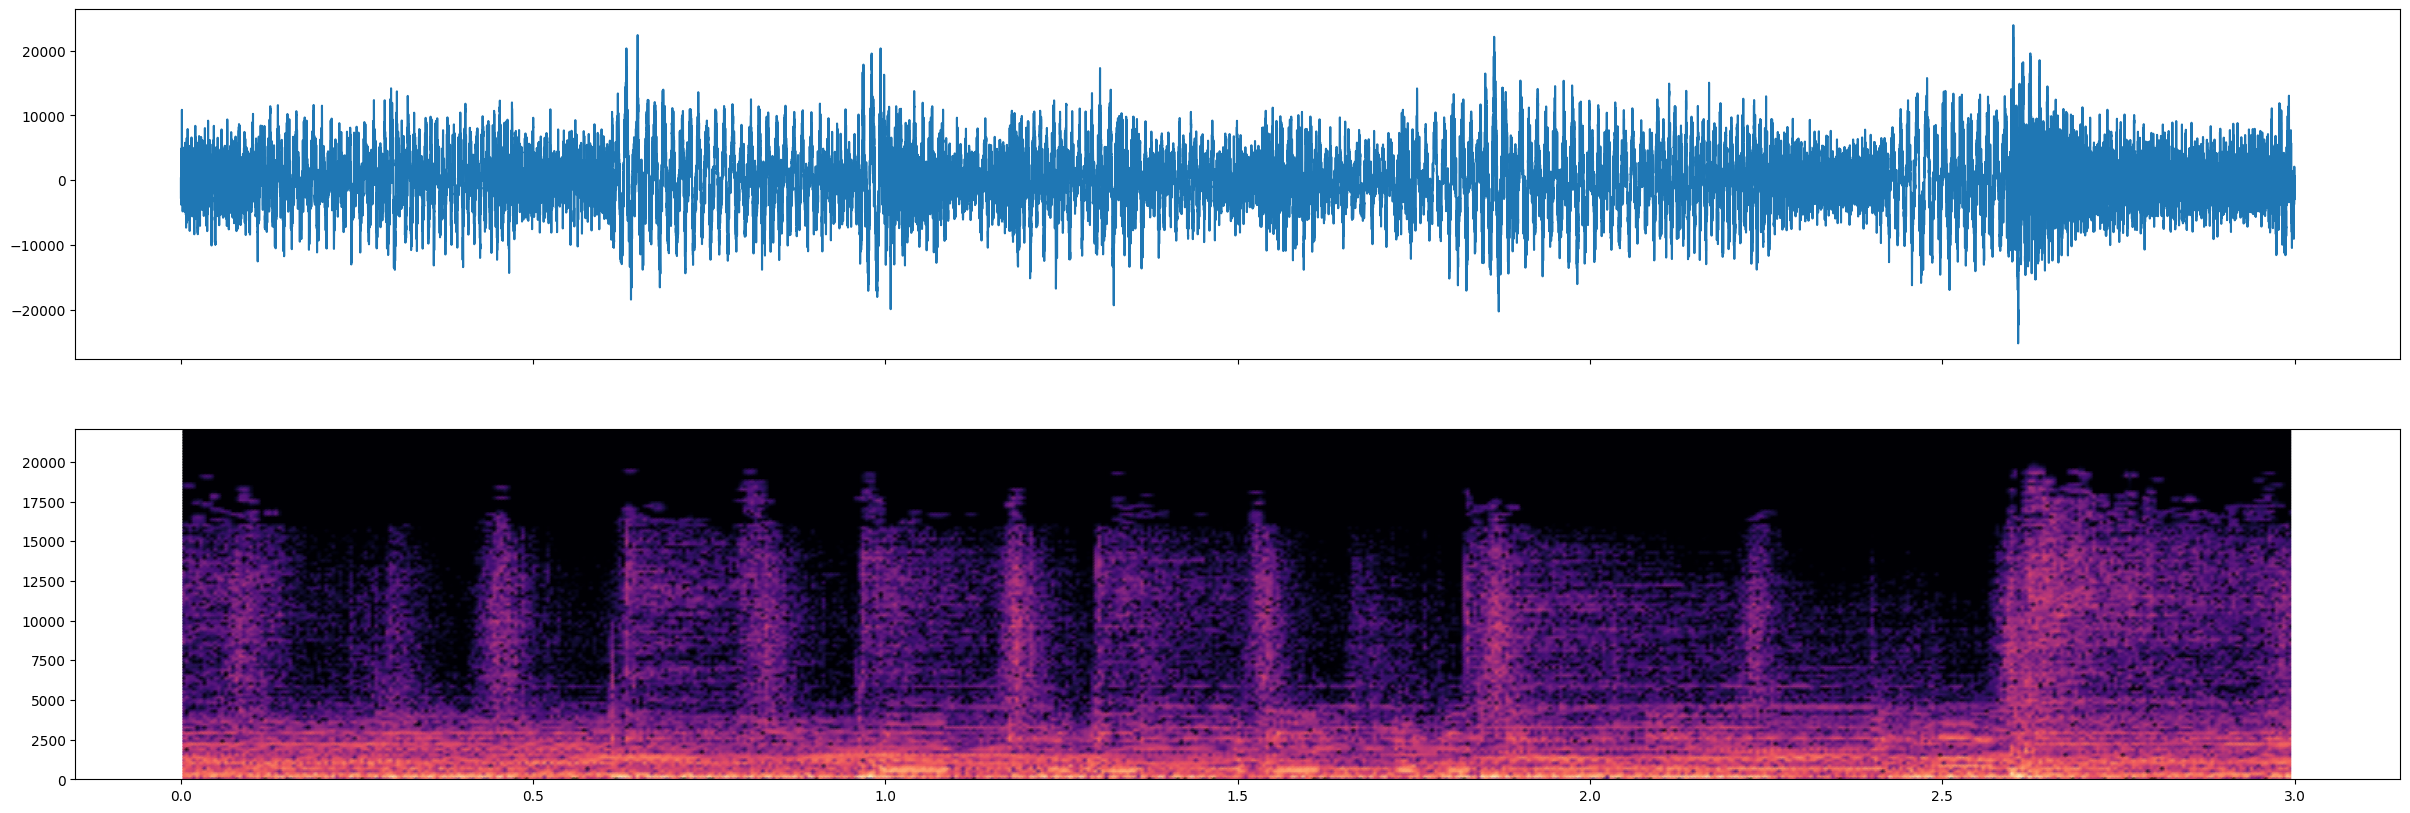

In [3]:
import scipy
from matplotlib import pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30,10), sharex=True)
x = signals[1]
samples = len(x)

t = np.linspace(0, samples / sample_rate, samples)
axs[0].plot(t, x)

f, t, Sxx = scipy.signal.spectrogram(x, sample_rate)

Sxx_db = 10 * np.log10(Sxx)

mesh = axs[1].pcolormesh(t, f, Sxx_db, shading="gouraud", cmap="magma", vmin=0)

In [4]:

from sklearn.model_selection import train_test_split

features = np.array([scipy.signal.spectrogram(signal, sample_rate)[2] for signal in signals])

# TODO: convert to mel scale

features = np.reshape(features, (features.shape[0], -1)) # flatten

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42) # set random state so the test set is always the same
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [5]:
features.shape

(2647, 76110)

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import SparsePCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([    
    ('normalize', StandardScaler()),    
    ('classifier', RandomForestClassifier(250))
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('normalize', StandardScaler()),
                ('classifier', RandomForestClassifier(n_estimators=250))])

In [8]:
x_hat_test = pipe.predict(X_test)

def error(x_hat, y):
    return np.mean(x_hat != y)

error(x_hat_test, y_test)

0.43018867924528303